# Estimation de la densité par l’histogramme

##### L’approche classique pour estimer une densité est de supposer un modèle paramétrique : par exemple, en dimension 1, on représente les données par un histogramme, et si la courbe est en cloche avec des queues légères, on conclut qu’il y a de fortes chances que le modèle suive une loi gaussienne. Il n’y a alors plus qu’à estimer la moyenne et la variance (µ, σ2), c’est-à-dire un paramètre de dimension 2. On peut aussi se trouver dans un cas où on a des connaissances a priori sur les données, nous amenant à poser encore une loi paramétrique (ex typique : nombre de voitures passant par un carrefour par jour, représenté en général par une loi de poisson). Il y a plusieurs problèmes possibles avec cette approche : en dimension supérieure à 2 il sera difficile de représenter les données et d’intuiter une loi connue, parfois on n’a pas de connaissances a priori sur le sujet etc.
##### De plus, si on se trompe de modèle, on arrivera à une interprétation erronée des données.
##### Un modèle non paramétrique est moins rigide, et fait moins de suppositions a priori sur les données.

#### Comment estimer non-paramétriquement la densité de probabilité f, en se basant sur les observations X1, · · · , Xn? Il existe plusieurs m´ethodes d’estimation non-paramétrique d’une densité. La méthode la plus simple est celle de l’histogramme.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# On suppose la distribution suivante
import random
X = [random.randrange(-100, 100) for i in range(40)]
print(X)

[-55, -72, 69, -92, -100, 41, -57, -49, 51, -72, 51, -7, 75, -23, 59, -36, 34, 26, 95, 82, -46, 67, 72, -38, -14, -31, 42, 88, -38, 7, -18, 78, 13, -1, -44, 21, 27, 26, -88, 40]


(array([3., 2., 5., 5., 3., 3., 5., 5., 5., 4.]),
 array([-100. ,  -80.5,  -61. ,  -41.5,  -22. ,   -2.5,   17. ,   36.5,
          56. ,   75.5,   95. ]),
 <BarContainer object of 10 artists>)

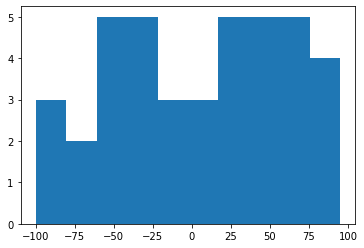

In [3]:
plt.hist(X)

## Etape 1 : Détermination de la longueur des intervalles 
## $\displaystyle\mathbb{h^*} = [\frac{6}{n\int_Rf'^2(x)dx}]^{1/3}$
## La fonction $f$ est estimée par la fonction de densité de la loi normale centrée réduite
## $f(x) \sim \frac{1}{\sqrt{2\pi}}e^{-x^2} \Rightarrow f'(x) \sim \frac{-2x}{\sqrt{2\pi}}e^{-x^2}$

In [4]:
from math import sqrt, exp, pi
f_prim_sq = lambda x : ((-2 * x * exp(-x**2)) / sqrt(2 * pi)) * ((-2 * x * exp(-x**2)) / sqrt(2 * pi))
f_prim_sq = np.vectorize(f_prim_sq)

Estimation de l'intégrale :  0.19947114020071638


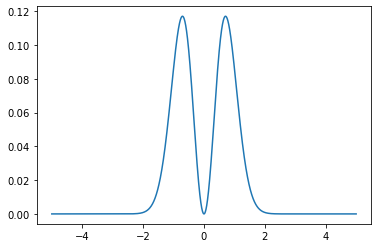

In [5]:
x = np.arange(-5,5,0.001)
y = f_prim_sq(x)
print("Estimation de l'intégrale : ",np.trapz(y,x))
plt.plot(x,y)

In [6]:
n = len(X)
val = np.trapz(y,x) # valeur de l'integrale
h = (6 / (n * val)) ** (1/3)
print("La longeur de l'intervalle h={}".format(h))

La longeur de l'intervalle h=0.9093625461175313


## Estimation de l'AMISE
## $\displaystyle AMISE_{h^*}(\hat{f}_n) = (\frac{3}{4})^\frac{2}{3}(\int_Rf'^2(x)dx)^\frac{1}{3}n^\frac{-2}{3}$

In [9]:
amise = ((3/4)**(2/3)) * (val ** (1/3)) * ((1/n)**(3/2))
print("L'AMSIE est de {}".format(amise))

L'AMSIE est de 0.0019065324958189604


## Etape 2 : Délimitation de l'intervalle [a,b] en J intervalles de longeurs $\mathbb{h^*}$
## $\displaystyle b = a + (J*h) \Rightarrow J = \frac{b - a}{h}$ 

In [38]:
a, b = min(X), max(X)
print("L'intervalle est [{} , {}]".format(a,b))
J = (b - a) / h
print("Pour une longeur de h = {}, on obtient {} intervalles".format(np.around(h,3), int(J)))
A = np.arange(a,b,h)
# Correction de la derniere valeur
A[int(J)] = b

L'intervalle est [-99 , 96]
Pour une longeur de 0.909, on obtient 214 intervalles


## Etape 3 : Estimation de la densité $\hat{f}$
## La densité en tout point x de l’intervalle $[a_j, a_{j+1}]$ qui contient $k_i$ observations de $X = (x_1, x_2, ..., x_n)$ est estimée par $\hat{f}(x) = \frac{k_i}{nh^*}$

In [39]:
K = np.array([((np.array(X) >= A[j]) * (np.array(X) <= A[j+1])).sum() for j in range(len(A)-1)])
f_chap = K / (n * h)
print(f_chap)

[0.05498357 0.         0.         0.02749179 0.         0.
 0.         0.         0.02749179 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05498357 0.
 0.         0.         0.         0.         0.02749179 0.
 0.         0.         0.02749179 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02749179 0.         0.         0.02749179 0.         0.
 0.05498357 0.         0.02749179 0.         0.         0.
 0.         0.         0.02749179 0.02749179 0.         0.02749179
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02749179 0.         0.         0.         0.         0.
 0.         0.         0.02749179 0.         0.         0.
 0.02749179 0.         0.         0.         0.         0.02749179
 0.02749179 0.         0.         0.    

## Courbe de la densité estimée

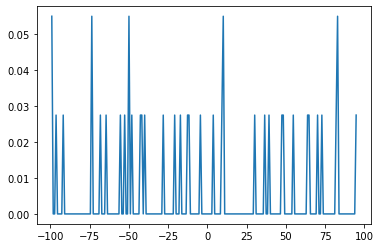

In [40]:
plt.plot(A[:(len(A)-1)],f_chap)

(array([0.00384615, 0.0025641 , 0.00641026, 0.00641026, 0.00384615,
        0.00384615, 0.00641026, 0.00641026, 0.00641026, 0.00512821]),
 array([-100. ,  -80.5,  -61. ,  -41.5,  -22. ,   -2.5,   17. ,   36.5,
          56. ,   75.5,   95. ]),
 <BarContainer object of 10 artists>)

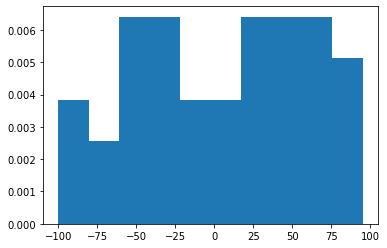

In [10]:
plt.hist(X, density=True)

## REMARQUE

#### • L’histogramme de densité est un estimateur très élémentaire, mais peut quand même déjà donner une première idée assez bonne de la forme de la densité f. Par contre, si on voulait utiliser cet estimateur dans d’autres analyses statistiques (comme par exemple l’analyse discriminante, l’estimation d’un taux de hasard, etc) il vaudrait mieux démarrer avec un estimateur plus précis.
#### • L’histogramme de densité est une fonction étagée, et donc discontinue.

#### • Un inconvénient de l’estimateur par histogramme est que la fonction de densité résultante fˆn n’est pas régulière : il s’agit d’une fonction constante par morceau, qui a donc des sauts aux extrémités de chaque classe. En général, la densité à estimer est plus lisse, au moins continue.
#### • L’estimation par noyau a pour but de résoudre ce problème.